# Late Adopters Prediction

## Import Data

In [226]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


C:\Users\Jason\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Clean Data

In [202]:
df_customer = pd.read_csv("C:/Users/Jason/Documents/Schulich/MBAN6110/Mid_Term/a1_dataset.dat", header=None, delimiter=";")
print ("Data: type %s shape %s" % (type(df_customer), df_customer.shape))

df_customer.columns = df_customer.iloc[0,:] ### use ndarray index to retrieve column names
df_customer = df_customer[df_customer.UserID.str.match("([0-9]+)")]

df_customer['Target'] = np.where(df_customer.Adopter_Class.str.contains("Late"), 1.0, 0.0) ### difference in df.Target vs df['Target']
df_customer=df_customer.drop('Adopter_Class', axis=1) ### drop "Adopter_Class column"

df_customer.head(10) ### check 
print ("Total instance %d" % (df_customer.shape[0]))

df_customer.dropna() ### drop all rows with any null value 
print ("Total instance %d" % (df_customer.shape[0]))

interval_features = ['UserID','Age']

df_customer.describe(include='all')

df_customer=df_customer[df_customer['Marital_Status'].notnull()]  ### remove Marital_Status null rows
df_customer.describe(include='all')

df_customer=df_customer.dropna() ### cleaned final data
print (df_customer['Target'].dtype)

Data: type <class 'pandas.core.frame.DataFrame'> shape (4679, 10)
Total instance 4674
Total instance 4674
float64


In [203]:
df_customer.describe(include='all')

,UserID,Gender,Age,Marital_Status,Current_Plan,Payment_Method,Contract_Length,Has_Kids,Other_Services_Bundled,Target
count,4666,4666,4666,4666,4666,4666,4666,4666,4666,4666.000000
unique,4661,2,49,2,4,2,4,2,2,NaN
top,25384,M,42,Married,Low,Non-Automatic,No Contract,N,Y,NaN
freq,2,2333,124,2334,1201,2842,2019,2351,2357,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478783
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.499603
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


## Feature Engineering

In [204]:
categorical_features=df_customer.columns
print (type(categorical_features))
categorical_features=list(categorical_features)  ### convert index into list 

dropping_variables = ['UserID','Target']

features = [feature for feature in categorical_features if feature not in dropping_variables]  ### remove UserID and Target Variabl


data = pd.get_dummies(df_customer, columns=features, drop_first=True)
data.head(10)

<class 'pandas.core.indexes.base.Index'>


,UserID,Target,Gender_M,Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,Age_24,...,Marital_Status_Single,Current_Plan_Low,Current_Plan_Medium,Current_Plan_PrePaid,Payment_Method_Non-Automatic,Contract_Length_24 months,Contract_Length_36 Months,Contract_Length_No Contract,Has_Kids_Y,Other_Services_Bundled_Y
1,44793,0.0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
2,41648,1.0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
3,33568,0.0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
4,22041,1.0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,1
5,25439,0.0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
6,35806,1.0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
7,25384,0.0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,1
8,34179,0.0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
9,49554,1.0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
10,19807,0.0,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,1


## Split Data

In [205]:
X=data.drop('Target' , axis = 1)
y=data['Target']

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

## Train and Evaluate the model

In [206]:
from sklearn import tree
from sklearn.metrics import accuracy_score

def best_accuracy(class_weight=None, max_depth=None):
    
    max_leaf_nodes_list = [2, 4, 8, 16, 32, 64, 128, 256]
    
    ### accuracy create dictonary 
    best_accuracy={}
    
    for node in max_leaf_nodes_list:
        clf=tree.DecisionTreeClassifier(max_leaf_nodes=node, max_depth=max_depth)
        clf=clf.fit(X_train, y_train)
        best_accuracy[node] = clf.score(X_test, y_test)
        
        
    return [{k:v} for k,v in best_accuracy.items() if v==max(best_accuracy.values())]
    

    
best_accuracy()
list(best_accuracy()[0].keys())[0]
best_accuracy()[0].get(list(best_accuracy()[0].keys())[0])

0.61670235546038543

In [207]:
from sklearn import tree

clf=tree.DecisionTreeClassifier(max_leaf_nodes=list(best_accuracy()[0].keys())[0])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print(" Undersampling imbalanced classes with no max depth limit")
print(" Best Model: %d Nodes " %(list(best_accuracy()[0].keys())[0]))
print(" Best Model: %.2f Accuracy in Training Set " %(best_accuracy()[0].get(list(best_accuracy()[0].keys())[0])))
print(" Best Model: %.2f Accuracy in Test Set" %(accuracy_score(y_test, y_pred)))

clf=tree.DecisionTreeClassifier(max_leaf_nodes=list(best_accuracy(max_depth=2)[0].keys())[0])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)
print(" Undersampling imbalanced classes with 2 max depth limit")
print(" Best Model: %d Nodes " %(list(best_accuracy(max_depth=2)[0].keys())[0]))
print(" Best Model: %.2f Accuracy in Training Set " %(best_accuracy(max_depth=2)[0].get(list(best_accuracy(max_depth=2)[0].keys())[0])))
print(" Best Model: %.2f Accuracy in Test Set" %(accuracy_score(y_test, y_pred)))


clf=tree.DecisionTreeClassifier(max_leaf_nodes=list(best_accuracy(max_depth=4)[0].keys())[0])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)
print(" Undersampling imbalanced classes with 4 max depth limit")
print(" Best Model: %d Nodes " %(list(best_accuracy(max_depth=4)[0].keys())[0]))
print(" Best Model: %.2f Accuracy in Training Set " %(best_accuracy(max_depth=4)[0].get(list(best_accuracy(max_depth=4)[0].keys())[0])))
print(" Best Model: %.2f Accuracy in Test Set" %(accuracy_score(y_test, y_pred)))



clf=tree.DecisionTreeClassifier(max_leaf_nodes=list(best_accuracy(max_depth=6)[0].keys())[0])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)
print(" Undersampling imbalanced classes with 6 max depth limit")
print(" Best Model: %d Nodes " %(list(best_accuracy(max_depth=6)[0].keys())[0]))
print(" Best Model: %.2f Accuracy in Training Set " %(best_accuracy(max_depth=6)[0].get(list(best_accuracy(max_depth=6)[0].keys())[0])))
print(" Best Model: %.2f Accuracy in Test Set" %(accuracy_score(y_test, y_pred)))


clf=tree.DecisionTreeClassifier(max_leaf_nodes=list(best_accuracy(max_depth=8)[0].keys())[0])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)
print(" Undersampling imbalanced classes with 8 max depth limit")
print(" Best Model: %d Nodes " %(list(best_accuracy(max_depth=8)[0].keys())[0]))
print(" Best Model: %.2f Accuracy in Training Set " %(best_accuracy(max_depth=8)[0].get(list(best_accuracy(max_depth=8)[0].keys())[0])))
print(" Best Model: %.2f Accuracy in Test Set" %(accuracy_score(y_test, y_pred)))


 Undersampling imbalanced classes with no max depth limit
 Best Model: 64 Nodes 
 Best Model: 0.62 Accuracy in Training Set 
 Best Model: 0.62 Accuracy in Test Set
 Undersampling imbalanced classes with 2 max depth limit
 Best Model: 8 Nodes 
 Best Model: 0.60 Accuracy in Training Set 
 Best Model: 0.58 Accuracy in Test Set
 Undersampling imbalanced classes with 4 max depth limit
 Best Model: 64 Nodes 
 Best Model: 0.59 Accuracy in Training Set 
 Best Model: 0.60 Accuracy in Test Set
 Undersampling imbalanced classes with 6 max depth limit
 Best Model: 32 Nodes 
 Best Model: 0.62 Accuracy in Training Set 
 Best Model: 0.60 Accuracy in Test Set
 Undersampling imbalanced classes with 8 max depth limit
 Best Model: 128 Nodes 
 Best Model: 0.61 Accuracy in Training Set 
 Best Model: 0.60 Accuracy in Test Set


In [211]:
clf=tree.DecisionTreeClassifier(max_leaf_nodes=list(best_accuracy(class_weight='balanced')[0].keys())[0])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print(" Undersampling imbalanced classes with no max depth limit")
print(" Best Model: %d Nodes " %(list(best_accuracy(class_weight='balanced')[0].keys())[0]))
print(" Best Model: %.2f Accuracy in Training Set " %(best_accuracy(class_weight='balanced')[0].get(list(best_accuracy(class_weight='balanced')[0].keys())[0])))
print(" Best Model: %.2f Accuracy in Test Set" %(accuracy_score(y_test, y_pred)))



clf=tree.DecisionTreeClassifier(max_leaf_nodes=list(best_accuracy(class_weight='balanced',max_depth=2)[0].keys())[0])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)
print(" Undersampling imbalanced classes with 2 max depth limit")
print(" Best Model: %d Nodes " %(list(best_accuracy(class_weight='balanced',max_depth=2)[0].keys())[0]))
print(" Best Model: %.2f Accuracy in Training Set " %(best_accuracy(class_weight='balanced',max_depth=2)[0].get(list(best_accuracy(class_weight='balanced',max_depth=2)[0].keys())[0])))
print(" Best Model: %.2f Accuracy in Test Set" %(accuracy_score(y_test, y_pred)))


clf=tree.DecisionTreeClassifier(max_leaf_nodes=list(best_accuracy(class_weight='balanced',max_depth=4)[0].keys())[0])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)
print(" Undersampling imbalanced classes with 4 max depth limit")
print(" Best Model: %d Nodes " %(list(best_accuracy(class_weight='balanced',max_depth=4)[0].keys())[0]))
print(" Best Model: %.2f Accuracy in Training Set " %(best_accuracy(class_weight='balanced',max_depth=4)[0].get(list(best_accuracy(class_weight='balanced',max_depth=4)[0].keys())[0])))
print(" Best Model: %.2f Accuracy in Test Set" %(accuracy_score(y_test, y_pred)))

clf=tree.DecisionTreeClassifier(max_leaf_nodes=list(best_accuracy(class_weight='balanced',max_depth=6)[0].keys())[0])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)
print(" Undersampling imbalanced classes with 6 max depth limit")
print(" Best Model: %d Nodes " %(list(best_accuracy(class_weight='balanced',max_depth=6)[0].keys())[0]))
print(" Best Model: %.2f Accuracy in Training Set " %(best_accuracy(class_weight='balanced',max_depth=6)[0].get(list(best_accuracy(class_weight='balanced',max_depth=6)[0].keys())[0])))
print(" Best Model: %.2f Accuracy in Test Set" %(accuracy_score(y_test, y_pred)))

clf=tree.DecisionTreeClassifier(max_leaf_nodes=list(best_accuracy(max_depth=8)[0].keys())[0])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)
print(" Undersampling imbalanced classes with 8 max depth limit")
print(" Best Model: %d Nodes " %(list(best_accuracy(class_weight='balanced',max_depth=8)[0].keys())[0]))
print(" Best Model: %.2f Accuracy in Training Set " %(best_accuracy(class_weight='balanced',max_depth=8)[0].get(list(best_accuracy(class_weight='balanced',max_depth=8)[0].keys())[0])))
print(" Best Model: %.2f Accuracy in Test Set" %(accuracy_score(y_test, y_pred)))

 Undersampling imbalanced classes with no max depth limit
 Best Model: 64 Nodes 
 Best Model: 0.62 Accuracy in Training Set 
 Best Model: 0.62 Accuracy in Test Set
 Undersampling imbalanced classes with 2 max depth limit
 Best Model: 8 Nodes 
 Best Model: 0.60 Accuracy in Training Set 
 Best Model: 0.58 Accuracy in Test Set
 Undersampling imbalanced classes with 4 max depth limit
 Best Model: 32 Nodes 
 Best Model: 0.59 Accuracy in Training Set 
 Best Model: 0.62 Accuracy in Test Set
 Undersampling imbalanced classes with 6 max depth limit
 Best Model: 256 Nodes 
 Best Model: 0.63 Accuracy in Training Set 
 Best Model: 0.60 Accuracy in Test Set
 Undersampling imbalanced classes with 8 max depth limit
 Best Model: 256 Nodes 
 Best Model: 0.61 Accuracy in Training Set 
 Best Model: 0.60 Accuracy in Test Set


## Accuracy vs Maximum Depth Limit Plot 

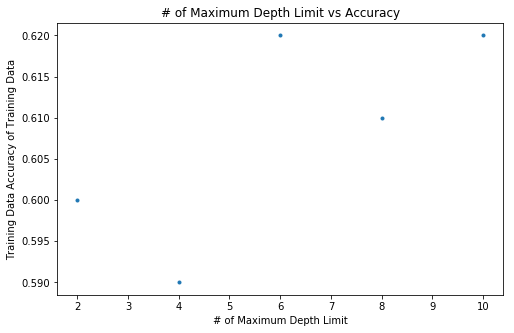

In [221]:
# create matplot figure and default properties
plt.figure(figsize=(8,5))
plt.xlabel('# of Maximum Depth Limit')
plt.ylabel('Training Data Accuracy of Training Data')
plt.title('# of Maximum Depth Limit vs Accuracy')


# default constraint variable, the iteration number, for cost history iterations
train_accuracy = [0.60, 0.59, 0.62, 0.61, 0.62]
max_depth_limits = [2,4,6,8,10]

plt.plot(max_depth_limits,train_accuracy, '.')

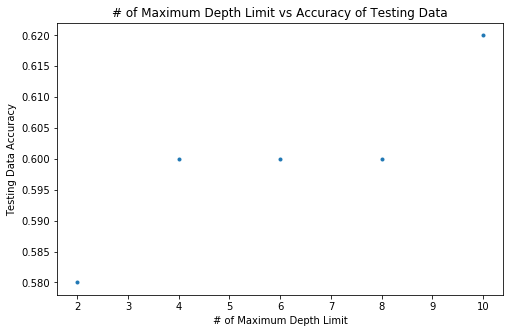

In [220]:
# create matplot figure and default properties
plt.figure(figsize=(8,5))
plt.xlabel('# of Maximum Depth Limit')
plt.ylabel('Testing Data Accuracy')
plt.title('# of Maximum Depth Limit vs Accuracy of Testing Data')


# default constraint variable, the iteration number, for cost history iterations
train_accuracy = [0.58, 0.60, 0.60, 0.60, 0.62]
max_depth_limits = [2,4,6,8,10]

plt.plot(max_depth_limits,train_accuracy, '.')

# As maximum depth limit increases the accuracy also tend to increase.

# Accuracy vs Maximum Leaf Nodes

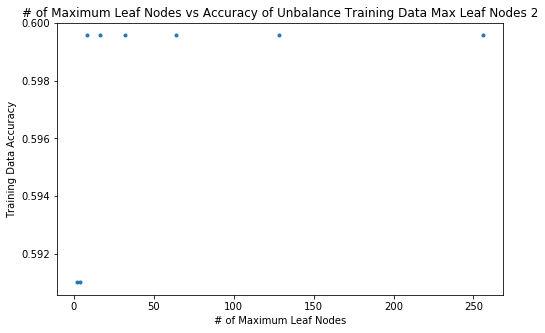

In [235]:
# create matplot figure and default properties
plt.figure(figsize=(8,5))
plt.xlabel('# of Maximum Leaf Nodes')
plt.ylabel('Training Data Accuracy')
plt.title('# of Maximum Leaf Nodes vs Accuracy of Unbalance Training Data Max Leaf Nodes 2')

# default constraint variable, the iteration number, for cost history iterations
max_leaf_nodes_list = [2, 4, 8, 16, 32, 64, 128, 256]

# for max_depth_limit in [2,4,6,8,10]: 
accuracy_hist = []
    
for node in max_leaf_nodes_list:
    clf=tree.DecisionTreeClassifier(max_leaf_nodes=node, max_depth=2)
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy_hist.append(accuracy_score(y_test, y_pred))

plt.plot(max_leaf_nodes_list, accuracy_hist, '.')

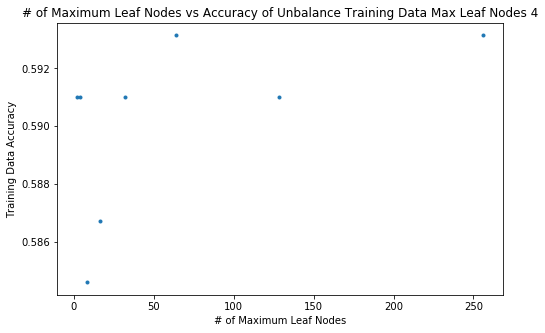

In [236]:
# create matplot figure and default properties
plt.figure(figsize=(8,5))
plt.xlabel('# of Maximum Leaf Nodes')
plt.ylabel('Training Data Accuracy')
plt.title('# of Maximum Leaf Nodes vs Accuracy of Unbalance Training Data Max Leaf Nodes 4')

# default constraint variable, the iteration number, for cost history iterations
max_leaf_nodes_list = [2, 4, 8, 16, 32, 64, 128, 256]

# for max_depth_limit in [2,4,6,8,10]: 
accuracy_hist = []
    
for node in max_leaf_nodes_list:
    clf=tree.DecisionTreeClassifier(max_leaf_nodes=node, max_depth=4)
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy_hist.append(accuracy_score(y_test, y_pred))

plt.plot(max_leaf_nodes_list, accuracy_hist, '.')

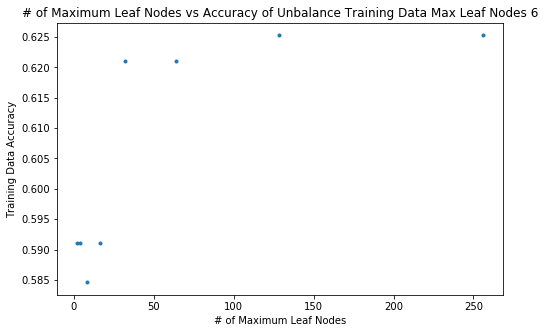

In [237]:
# create matplot figure and default properties
plt.figure(figsize=(8,5))
plt.xlabel('# of Maximum Leaf Nodes')
plt.ylabel('Training Data Accuracy')
plt.title('# of Maximum Leaf Nodes vs Accuracy of Unbalance Training Data Max Leaf Nodes 6')

# default constraint variable, the iteration number, for cost history iterations
max_leaf_nodes_list = [2, 4, 8, 16, 32, 64, 128, 256]

# for max_depth_limit in [2,4,6,8,10]: 
accuracy_hist = []
    
for node in max_leaf_nodes_list:
    clf=tree.DecisionTreeClassifier(max_leaf_nodes=node, max_depth=6)
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy_hist.append(accuracy_score(y_test, y_pred))

plt.plot(max_leaf_nodes_list, accuracy_hist, '.')

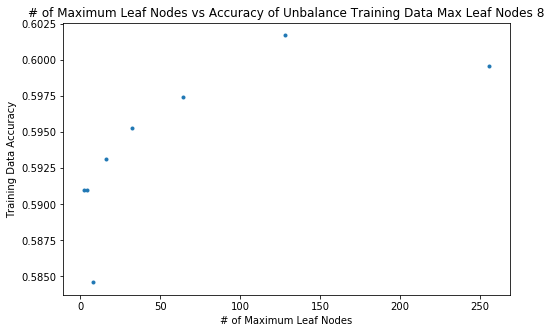

In [238]:
# create matplot figure and default properties
plt.figure(figsize=(8,5))
plt.xlabel('# of Maximum Leaf Nodes')
plt.ylabel('Training Data Accuracy')
plt.title('# of Maximum Leaf Nodes vs Accuracy of Unbalance Training Data Max Leaf Nodes 8')

# default constraint variable, the iteration number, for cost history iterations
max_leaf_nodes_list = [2, 4, 8, 16, 32, 64, 128, 256]

# for max_depth_limit in [2,4,6,8,10]: 
accuracy_hist = []
    
for node in max_leaf_nodes_list:
    clf=tree.DecisionTreeClassifier(max_leaf_nodes=node, max_depth=8)
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy_hist.append(accuracy_score(y_test, y_pred))

plt.plot(max_leaf_nodes_list, accuracy_hist, '.')

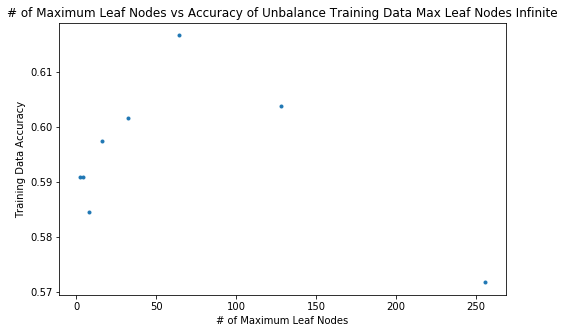

In [239]:
# create matplot figure and default properties
plt.figure(figsize=(8,5))
plt.xlabel('# of Maximum Leaf Nodes')
plt.ylabel('Training Data Accuracy')
plt.title('# of Maximum Leaf Nodes vs Accuracy of Unbalance Training Data Max Leaf Nodes Infinite')

# default constraint variable, the iteration number, for cost history iterations
max_leaf_nodes_list = [2, 4, 8, 16, 32, 64, 128, 256]

# for max_depth_limit in [2,4,6,8,10]: 
accuracy_hist = []
    
for node in max_leaf_nodes_list:
    clf=tree.DecisionTreeClassifier(max_leaf_nodes=node)
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy_hist.append(accuracy_score(y_test, y_pred))

plt.plot(max_leaf_nodes_list, accuracy_hist, '.')

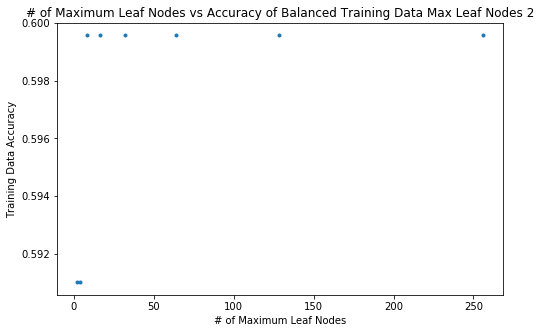

In [241]:
# create matplot figure and default properties
plt.figure(figsize=(8,5))
plt.xlabel('# of Maximum Leaf Nodes')
plt.ylabel('Training Data Accuracy')
plt.title('# of Maximum Leaf Nodes vs Accuracy of Balanced Training Data Max Leaf Nodes 2')

# default constraint variable, the iteration number, for cost history iterations
max_leaf_nodes_list = [2, 4, 8, 16, 32, 64, 128, 256]

# for max_depth_limit in [2,4,6,8,10]: 
accuracy_hist = []
    
for node in max_leaf_nodes_list:
    clf=tree.DecisionTreeClassifier(max_leaf_nodes=node, max_depth=2,class_weight='balanced')
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy_hist.append(accuracy_score(y_test, y_pred))

plt.plot(max_leaf_nodes_list, accuracy_hist, '.')

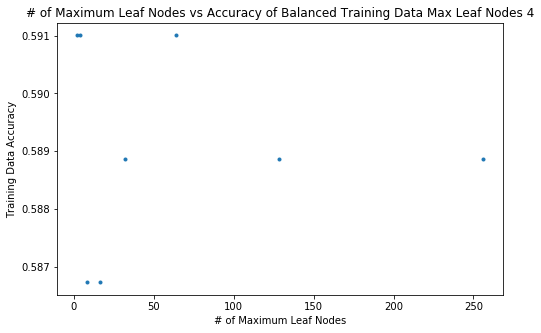

In [242]:
# create matplot figure and default properties
plt.figure(figsize=(8,5))
plt.xlabel('# of Maximum Leaf Nodes')
plt.ylabel('Training Data Accuracy')
plt.title('# of Maximum Leaf Nodes vs Accuracy of Balanced Training Data Max Leaf Nodes 4')

# default constraint variable, the iteration number, for cost history iterations
max_leaf_nodes_list = [2, 4, 8, 16, 32, 64, 128, 256]

# for max_depth_limit in [2,4,6,8,10]: 
accuracy_hist = []
    
for node in max_leaf_nodes_list:
    clf=tree.DecisionTreeClassifier(max_leaf_nodes=node, max_depth=4,class_weight='balanced')
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy_hist.append(accuracy_score(y_test, y_pred))

plt.plot(max_leaf_nodes_list, accuracy_hist, '.')

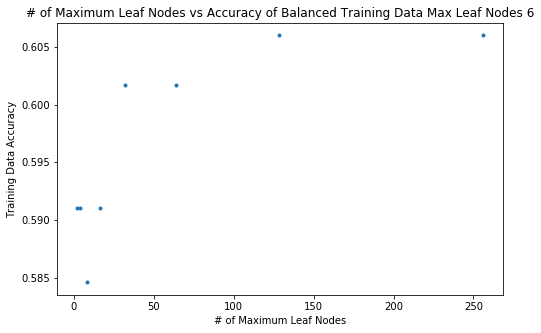

In [243]:
# create matplot figure and default properties
plt.figure(figsize=(8,5))
plt.xlabel('# of Maximum Leaf Nodes')
plt.ylabel('Training Data Accuracy')
plt.title('# of Maximum Leaf Nodes vs Accuracy of Balanced Training Data Max Leaf Nodes 6')

# default constraint variable, the iteration number, for cost history iterations
max_leaf_nodes_list = [2, 4, 8, 16, 32, 64, 128, 256]

# for max_depth_limit in [2,4,6,8,10]: 
accuracy_hist = []
    
for node in max_leaf_nodes_list:
    clf=tree.DecisionTreeClassifier(max_leaf_nodes=node, max_depth=6,class_weight='balanced')
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy_hist.append(accuracy_score(y_test, y_pred))

plt.plot(max_leaf_nodes_list, accuracy_hist, '.')

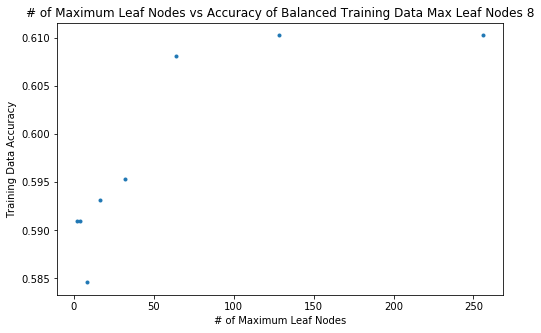

In [244]:
# create matplot figure and default properties
plt.figure(figsize=(8,5))
plt.xlabel('# of Maximum Leaf Nodes')
plt.ylabel('Training Data Accuracy')
plt.title('# of Maximum Leaf Nodes vs Accuracy of Balanced Training Data Max Leaf Nodes 8')

# default constraint variable, the iteration number, for cost history iterations
max_leaf_nodes_list = [2, 4, 8, 16, 32, 64, 128, 256]

# for max_depth_limit in [2,4,6,8,10]: 
accuracy_hist = []
    
for node in max_leaf_nodes_list:
    clf=tree.DecisionTreeClassifier(max_leaf_nodes=node, max_depth=8,class_weight='balanced')
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy_hist.append(accuracy_score(y_test, y_pred))

plt.plot(max_leaf_nodes_list, accuracy_hist, '.')

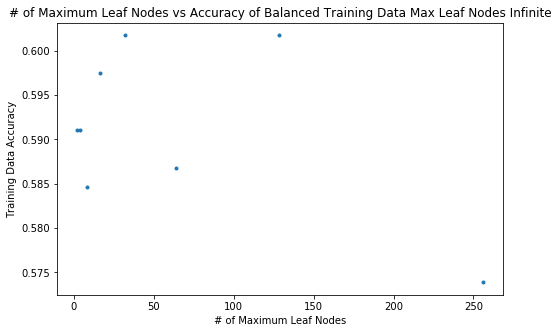

In [245]:
# create matplot figure and default properties
plt.figure(figsize=(8,5))
plt.xlabel('# of Maximum Leaf Nodes')
plt.ylabel('Training Data Accuracy')
plt.title('# of Maximum Leaf Nodes vs Accuracy of Balanced Training Data Max Leaf Nodes Infinite')

# default constraint variable, the iteration number, for cost history iterations
max_leaf_nodes_list = [2, 4, 8, 16, 32, 64, 128, 256]

# for max_depth_limit in [2,4,6,8,10]: 
accuracy_hist = []
    
for node in max_leaf_nodes_list:
    clf=tree.DecisionTreeClassifier(max_leaf_nodes=node,class_weight='balanced')
    clf=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    accuracy_hist.append(accuracy_score(y_test, y_pred))

plt.plot(max_leaf_nodes_list, accuracy_hist, '.')

# Accuracy increases with the number of maximum leaf nodes, and balanced oversampling seems to produce higher accuracy.